

> SHARIF UNI


> IML project phase 1 - part 2 and 3


> 🔓 Alireza Haghshenas 




# Part 2 - Private Training

***In this section, you will first train a classification model using a standard approach, then train it with privacy enhancements, and compare the MIA accuracy of both models. (Use the provided model in model.py for all tasks.)***

### Simulation Question 4.

**Use 80 percent of the CIFAR-10 training data to train your model. This will serve as your baseline model.**

Importing Libraries and Defining the Model :

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

class CIFAR10Classifier(nn.Module):
    def __init__(self):
        super(CIFAR10Classifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(6272, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x


Data Transformations and Loading :

In [ ]:
# Transformations for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#  80% training and 20% validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170498071/170498071 [00:08<00:00, 20927305.32it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Initializing the Model, Loss Function, and Optimizer :

In [ ]:
model = CIFAR10Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training the Model :

In [ ]:
num_epochs = 10
train_loss_history = []
val_accuracy_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_loss_history.append(epoch_loss)

    # Calculate validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracy_history.append(val_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch [1/10], Loss: 1.7533, Validation Accuracy: 50.22%
Epoch [2/10], Loss: 1.4988, Validation Accuracy: 56.08%
Epoch [3/10], Loss: 1.3832, Validation Accuracy: 59.80%
Epoch [4/10], Loss: 1.3106, Validation Accuracy: 61.76%
Epoch [5/10], Loss: 1.2626, Validation Accuracy: 62.42%
Epoch [6/10], Loss: 1.2164, Validation Accuracy: 64.15%
Epoch [7/10], Loss: 1.1801, Validation Accuracy: 64.38%
Epoch [8/10], Loss: 1.1454, Validation Accuracy: 65.16%
Epoch [9/10], Loss: 1.1259, Validation Accuracy: 64.65%
Epoch [10/10], Loss: 1.0988, Validation Accuracy: 65.24%


Evaluating and Saving the Model

In [ ]:
# Evaluate the model on the test dataset
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Save the trained model
torch.save(model.state_dict(), 'cifar10_baseline_model.pth')

# Save the training and validation results
results_dict = {
    'train_loss_history': train_loss_history,
    'val_accuracy_history': val_accuracy_history,
    'test_accuracy': test_accuracy
}
torch.save(results_dict, 'training_results.dict')

print("Training complete.")


Test Accuracy: 64.85%
Training complete.


plot the result 2201baz

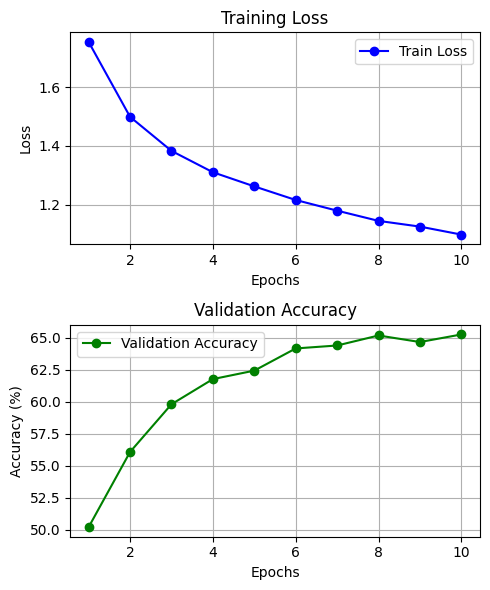

In [ ]:
plt.figure(figsize=(5, 6))

plt.subplot(2, 1, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, marker='o', color='b', label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(1, num_epochs + 1), val_accuracy_history, marker='o', color='g', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Simulation Question 5.

**Train your baseline model with privacy enhancements. This is your modified model. Ensure that the test accuracy difference between your baseline model and the modified model is less than 15**

In [ ]:
pip install opacus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from opacus import PrivacyEngine
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the CIFAR-10 Classifier model
class CIFAR10Classifier(nn.Module):
    def __init__(self):
        super(CIFAR10Classifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(6272, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x


Data Preparation

In [ ]:
# Transformations for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#  80% training and 20% validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


Load Baseline Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
baseline_model = CIFAR10Classifier().to(device)
baseline_model.load_state_dict(torch.load('cifar10_baseline_model.pth'))
baseline_model.eval()

CIFAR10Classifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=6272, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

Train Model with Privacy Enhancements

In [ ]:
def train_model_with_privacy(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=25):
    privacy_engine = PrivacyEngine()
    model, optimizer, train_loader = privacy_engine.make_private_with_epsilon(
        module=model,
        optimizer=optimizer,
        data_loader=train_loader,
        target_epsilon=6, # Adjust epsilon as needed for privacy budget
        target_delta=1e-5,
        epochs=num_epochs,
        max_grad_norm=1.0,
    )

    train_loss_history = []
    val_accuracy_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_loss_history.append(epoch_loss)

        # Calculate validation accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        val_accuracy_history.append(val_accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    return model, train_loss_history, val_accuracy_history

# Initialize and train the model with privacy enhancements
privacy_model = CIFAR10Classifier().to(device)
criterion = nn.CrossEntropyLoss()
privacy_optimizer = optim.Adam(privacy_model.parameters(), lr=0.0005)
privacy_model, privacy_train_loss_history, privacy_val_accuracy_history = train_model_with_privacy(
    privacy_model, train_loader, val_loader, criterion, privacy_optimizer, device, num_epochs=25)


/usr/local/lib/python3.10/dist-packages/opacus/privacy_engine.py:95: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3

Epoch [1/25], Loss: 2.2023, Validation Accuracy: 29.10%
Epoch [2/25], Loss: 2.0938, Validation Accuracy: 33.33%
Epoch [3/25], Loss: 2.0381, Validation Accuracy: 34.70%
Epoch [4/25], Loss: 2.0109, Validation Accuracy: 35.66%
Epoch [5/25], Loss: 1.9951, Validation Accuracy: 37.38%
Epoch [6/25], Loss: 1.9838, Validation Accuracy: 37.88%
Epoch [7/25], Loss: 1.9669, Validation Accuracy: 38.55%
Epoch [8/25], Loss: 1.9605, Validation Accuracy: 39.05%
Epoch [9/25], Loss: 1.9602, Validation Accuracy: 40.09%
Epoch [10/25], Loss: 1.9488, Validation Accuracy: 40.78%
Epoch [11/25], Loss: 1.9374, Validation Accuracy: 41.42%
Epoch [12/25], Loss: 1.9480, Validation Accuracy: 41.37%
Epoch [13/25], Loss: 1.9415, Validation Accuracy: 42.44%
Epoch [14/25], Loss: 1.9434, Validation Accuracy: 43.16%
Epoch [15/25], Loss: 1.9395, Validation Accuracy: 43.18%
Epoch [16/25], Loss: 1.9406, Validation Accuracy: 43.80%
Epoch [17/25], Loss: 1.9385, Validation Accuracy: 44.10%
Epoch [18/25], Loss: 1.9336, Validation 

Evaluate Models and Compare Results

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

baseline_test_accuracy = evaluate_model(baseline_model, test_loader)
print(f'Baseline Test Accuracy: {baseline_test_accuracy*100:.2f}%')

privacy_test_accuracy = evaluate_model(privacy_model, test_loader)
print(f'Privacy Test Accuracy: {privacy_test_accuracy*100:.2f}%')

accuracy_difference = baseline_test_accuracy - privacy_test_accuracy
print(f'Accuracy Difference: {accuracy_difference*100:.2f}%')
assert accuracy_difference < 15, "Accuracy difference is more than 15%"


Baseline Test Accuracy: 64.85%


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Privacy Test Accuracy: 46.60%
Accuracy Difference: 18.25%


Plotting the Results

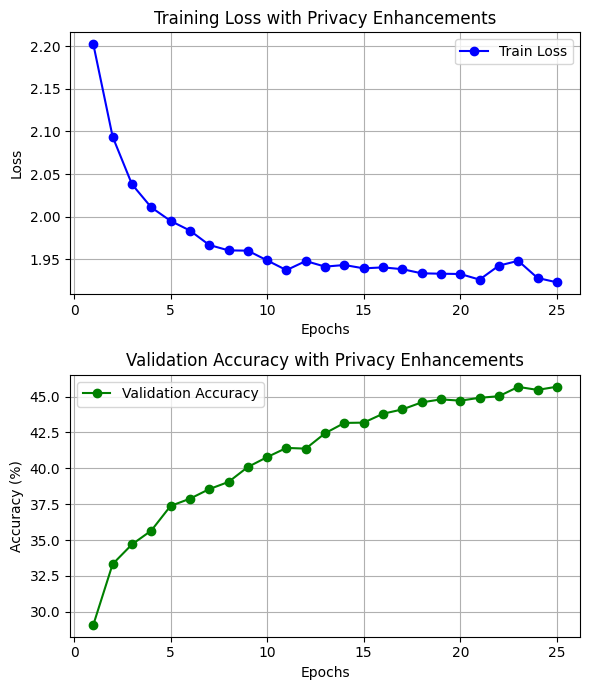

In [ ]:
plt.figure(figsize=(6, 7))

plt.subplot(2, 1, 1)
plt.plot(range(1, len(privacy_train_loss_history) + 1), privacy_train_loss_history, marker='o', color='b', label='Train Loss')
plt.title('Training Loss with Privacy Enhancements')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(1, len(privacy_val_accuracy_history) + 1), privacy_val_accuracy_history, marker='o', color='g', label='Validation Accuracy')
plt.title('Validation Accuracy with Privacy Enhancements')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


Save the Modified Model and Results

In [ ]:
# Save the privacy-enhanced model correctly
def save_model_correctly(model, path):
    # Remove the "_module" prefix
    state_dict = model.state_dict()
    new_state_dict = {k.replace("_module.", ""): v for k, v in state_dict.items()}
    torch.save(new_state_dict, path)

save_model_correctly(privacy_model, 'cifar10_privacy_model.pth')

# Save the training and validation results for the privacy-enhanced model
privacy_results_dict = {
    'train_loss_history': privacy_train_loss_history,
    'val_accuracy_history': privacy_val_accuracy_history,
    'test_accuracy': privacy_test_accuracy
}
torch.save(privacy_results_dict, 'privacy_training_results.dict')

print("Training with privacy enhancements complete.")

Training with privacy enhancements complete.


### Simulation Question 6.

**Train two Attacker Models based on MIA techniques learned in Phase 0, one for the baseline model and one for the modified model. Compare the MIA accuracy of these two attacker models. Use 80 percent of the training data as your seen data, and the remaining training data along with the test data as your unseen data.**

Import Libraries and Define Models

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define the CIFAR-10 Classifier model
class CIFAR10Classifier(nn.Module):
    def __init__(self):
        super(CIFAR10Classifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(6272, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

# Define the MIA Attacker model
class AttackerModel(nn.Module):
    def __init__(self):
        super(AttackerModel, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Load Data and Initialize Models

In [ ]:
# Transformations for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#80% seen and 20% unseen
train_size = int(0.8 * len(train_dataset))
seen_data, unseen_data = random_split(train_dataset, [train_size, len(train_dataset) - train_size])

# Combine the unseen training data and test data for the attacker model's unseen data
unseen_data = Subset(train_dataset, unseen_data.indices + list(range(len(test_dataset))))

# Data loaders
BATCH_SIZE = 64
seen_loader = DataLoader(seen_data, batch_size=BATCH_SIZE, shuffle=True)
unseen_loader = DataLoader(unseen_data, batch_size=BATCH_SIZE, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


Initialize and Load Pre-trained Models

In [ ]:
# Initialize models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
baseline_model = CIFAR10Classifier().to(device)
privacy_model = CIFAR10Classifier().to(device)

baseline_model.load_state_dict(torch.load('cifar10_baseline_model.pth'))
privacy_model.load_state_dict(torch.load('cifar10_privacy_model.pth'))

baseline_model.eval()
privacy_model.eval()


CIFAR10Classifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=6272, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

Generate Query Data Using Shadow Models

In [ ]:
def generate_query_data_shadow_models(model_class, data_loader, label, model_path, num_shadow_models=5):
    features = []
    labels = []
    for _ in range(num_shadow_models):
        shadow_model = model_class().to(device)
        shadow_model.load_state_dict(torch.load(model_path))  # Load the specified model
        shadow_model.eval()
        with torch.no_grad():
            for inputs, _ in data_loader:
                inputs = inputs.to(device)
                outputs = shadow_model(inputs)
                features.extend(outputs.cpu().numpy())
                labels.extend([label] * outputs.size(0))
    return features, labels

# Generate query data for attacker models using multiple shadow models
baseline_seen_features, baseline_seen_labels = generate_query_data_shadow_models(CIFAR10Classifier, seen_loader, 1, 'cifar10_baseline_model.pth', num_shadow_models=10)
baseline_unseen_features, baseline_unseen_labels = generate_query_data_shadow_models(CIFAR10Classifier, unseen_loader, 0, 'cifar10_baseline_model.pth', num_shadow_models=10)
privacy_seen_features, privacy_seen_labels = generate_query_data_shadow_models(CIFAR10Classifier, seen_loader, 1, 'cifar10_privacy_model.pth', num_shadow_models=10)
privacy_unseen_features, privacy_unseen_labels = generate_query_data_shadow_models(CIFAR10Classifier, unseen_loader, 0, 'cifar10_privacy_model.pth', num_shadow_models=10)


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Prepare Data for Attacker Models

In [ ]:
# Combine features and labels
baseline_features = baseline_seen_features + baseline_unseen_features
baseline_labels = baseline_seen_labels + baseline_unseen_labels
privacy_features = privacy_seen_features + privacy_unseen_features
privacy_labels = privacy_seen_labels + privacy_unseen_labels

# Convert to tensors
baseline_features = torch.tensor(baseline_features, dtype=torch.float32)
baseline_labels = torch.tensor(baseline_labels, dtype=torch.long)
privacy_features = torch.tensor(privacy_features, dtype=torch.float32)
privacy_labels = torch.tensor(privacy_labels, dtype=torch.long)

# Data loaders for attacker models
baseline_loader = DataLoader(list(zip(baseline_features, baseline_labels)), batch_size=64, shuffle=True)
privacy_loader = DataLoader(list(zip(privacy_features, privacy_labels)), batch_size=64, shuffle=True)


Initialize and Train Attacker Models

In [ ]:
baseline_attacker = AttackerModel().to(device)
privacy_attacker = AttackerModel().to(device)

# Loss and optimizer for attacker models
criterion = nn.CrossEntropyLoss()
optimizer_baseline = optim.Adam(baseline_attacker.parameters(), lr=0.001)
optimizer_privacy = optim.Adam(privacy_attacker.parameters(), lr=0.001)

# Function to train attacker model and print accuracy in each epoch
def train_attacker(attacker_model, optimizer, data_loader, num_epochs=10):
    loss_history = []
    accuracy_history = []
    for epoch in range(num_epochs):
        attacker_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = attacker_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(data_loader)
        epoch_accuracy = correct / total
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f}, Accuracy: {epoch_accuracy:.8f}')
    return loss_history, accuracy_history

print("Training baseline attacker model...")
baseline_loss_history, baseline_accuracy_history = train_attacker(baseline_attacker, optimizer_baseline, baseline_loader)

print("Training privacy attacker model...")
privacy_loss_history, privacy_accuracy_history = train_attacker(privacy_attacker, optimizer_privacy, privacy_loader)


Training baseline attacker model...
Epoch [1/10], Loss: 0.63866, Accuracy: 0.66642500
Epoch [2/10], Loss: 0.63664, Accuracy: 0.66665667
Epoch [3/10], Loss: 0.63624, Accuracy: 0.66665667
Epoch [4/10], Loss: 0.63597, Accuracy: 0.66672167
Epoch [5/10], Loss: 0.63565, Accuracy: 0.66680833
Epoch [6/10], Loss: 0.63537, Accuracy: 0.66692500
Epoch [7/10], Loss: 0.63511, Accuracy: 0.66686000
Epoch [8/10], Loss: 0.63492, Accuracy: 0.66702500
Epoch [9/10], Loss: 0.63464, Accuracy: 0.66701667
Epoch [10/10], Loss: 0.63438, Accuracy: 0.66716000
Training privacy attacker model...
Epoch [1/10], Loss: 0.63812, Accuracy: 0.66643333
Epoch [2/10], Loss: 0.63664, Accuracy: 0.66665167
Epoch [3/10], Loss: 0.63635, Accuracy: 0.66665000
Epoch [4/10], Loss: 0.63627, Accuracy: 0.66663500
Epoch [5/10], Loss: 0.63613, Accuracy: 0.66663667
Epoch [6/10], Loss: 0.63598, Accuracy: 0.66667000
Epoch [7/10], Loss: 0.63582, Accuracy: 0.66665000
Epoch [8/10], Loss: 0.63566, Accuracy: 0.66666500
Epoch [9/10], Loss: 0.63549,

Evaluate Attacker Models and Plot Results

Baseline Attacker Model Accuracy: 0.66735
Privacy Attacker Model Accuracy: 0.66632


<ipython-input-38-83a2bfe1d05f>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


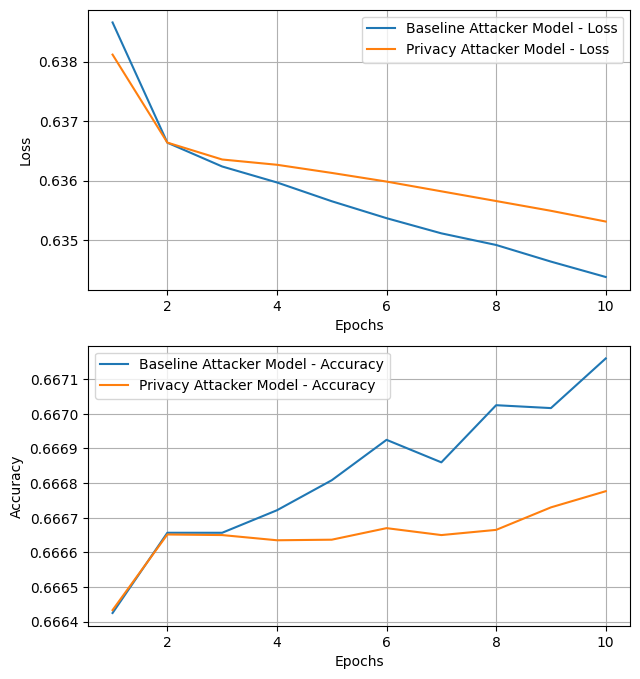

In [ ]:
def evaluate_attacker(attacker_model, features, labels):
    attacker_model.eval()
    with torch.no_grad():
        outputs = attacker_model(features.to(device))
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(labels.cpu(), predicted.cpu())
    return accuracy

baseline_attacker_accuracy = evaluate_attacker(baseline_attacker, baseline_features, baseline_labels)
privacy_attacker_accuracy = evaluate_attacker(privacy_attacker, privacy_features, privacy_labels)

print(f'Baseline Attacker Model Accuracy: {baseline_attacker_accuracy:.5f}')
print(f'Privacy Attacker Model Accuracy: {privacy_attacker_accuracy:.5f}')

plt.figure(figsize=(7, 8))
plt.title('Loss and Accuracy History of Attacker Models')
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), baseline_loss_history, label='Baseline Attacker Model - Loss')
plt.plot(range(1, 11), privacy_loss_history, label='Privacy Attacker Model - Loss')
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), baseline_accuracy_history, label='Baseline Attacker Model - Accuracy')
plt.plot(range(1, 11), privacy_accuracy_history, label='Privacy Attacker Model - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid(True)
plt.show()


### Simulation Question 7.

**Improve your attacker models to achieve better MIA accuracy for both the baseline and modified models (e.g., by increasing the number of shadow models) Then compare the new accuracies with the previous results.**

Import Libraries and Define Models

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define the CIFAR-10 Classifier model
class CIFAR10Classifier(nn.Module):
    def __init__(self):
        super(CIFAR10Classifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(6272, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

# Define the MIA Attacker model
class AttackerModel(nn.Module):
    def __init__(self):
        super(AttackerModel, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Load Data and Initialize Models

In [3]:
# Transformations for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split the training data into 80% seen and 20% unseen
train_size = int(0.8 * len(train_dataset))
seen_data, unseen_data = random_split(train_dataset, [train_size, len(train_dataset) - train_size])

# Combine the unseen training data and test data for the attacker model's unseen data
unseen_data = Subset(train_dataset, unseen_data.indices + list(range(len(test_dataset))))

# Data loaders
BATCH_SIZE = 64
seen_loader = DataLoader(seen_data, batch_size=BATCH_SIZE, shuffle=True)
unseen_loader = DataLoader(unseen_data, batch_size=BATCH_SIZE, shuffle=False)


100%|██████████| 170498071/170498071 [00:18<00:00, 9209037.94it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Generate Query Data from Enhanced Shadow Models

In [4]:
# Initialize models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
baseline_model = CIFAR10Classifier().to(device)
privacy_model = CIFAR10Classifier().to(device)

# Load pre-trained models
baseline_model.load_state_dict(torch.load('cifar10_baseline_model.pth'))
privacy_model.load_state_dict(torch.load('cifar10_privacy_model.pth'))

baseline_model.eval()
privacy_model.eval()


CIFAR10Classifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=6272, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

Train and Evaluate Attacker Models

In [5]:
# Function to generate query data using shadow models
def generate_query_data_shadow_models(model_class, data_loader, label, model_path, num_shadow_models=20):
    features = []
    labels = []
    for _ in range(num_shadow_models):
        shadow_model = model_class().to(device)
        shadow_model.load_state_dict(torch.load(model_path))  # Load the specified model
        shadow_model.eval()
        with torch.no_grad():
            for inputs, _ in data_loader:
                inputs = inputs.to(device)
                outputs = shadow_model(inputs)
                features.extend(outputs.cpu().numpy())
                labels.extend([label] * outputs.size(0))
    return features, labels

# Generate query data for attacker models using multiple shadow models
baseline_seen_features, baseline_seen_labels = generate_query_data_shadow_models(CIFAR10Classifier, seen_loader, 1, 'cifar10_baseline_model.pth', num_shadow_models=20)
baseline_unseen_features, baseline_unseen_labels = generate_query_data_shadow_models(CIFAR10Classifier, unseen_loader, 0, 'cifar10_baseline_model.pth', num_shadow_models=20)
privacy_seen_features, privacy_seen_labels = generate_query_data_shadow_models(CIFAR10Classifier, seen_loader, 1, 'cifar10_privacy_model.pth', num_shadow_models=20)
privacy_unseen_features, privacy_unseen_labels = generate_query_data_shadow_models(CIFAR10Classifier, unseen_loader, 0, 'cifar10_privacy_model.pth', num_shadow_models=20)


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [ ]:
# # Function to generate query data using shadow models
# def generate_query_data_shadow_models(model_class, data_loader, label, model_path, num_shadow_models=100):
#     features = []
#     labels = []
#     for _ in range(num_shadow_models):
#         shadow_model = model_class().to(device)
#         shadow_model.load_state_dict(torch.load(model_path))  # Load the specified model
#         shadow_model.eval()
#         with torch.no_grad():
#             for inputs, _ in data_loader:
#                 inputs = inputs.to(device)
#                 outputs = shadow_model(inputs)
#                 features.extend(outputs.cpu().numpy())
#                 labels.extend([label] * outputs.size(0))
#     return features, labels

# # Generate query data for attacker models using multiple shadow models
# baseline_seen_features, baseline_seen_labels = generate_query_data_shadow_models(CIFAR10Classifier, seen_loader, 1, 'cifar10_baseline_model.pth', num_shadow_models=100)
# baseline_unseen_features, baseline_unseen_labels = generate_query_data_shadow_models(CIFAR10Classifier, unseen_loader, 0, 'cifar10_baseline_model.pth', num_shadow_models=100)
# privacy_seen_features, privacy_seen_labels = generate_query_data_shadow_models(CIFAR10Classifier, seen_loader, 1, 'cifar10_privacy_model.pth', num_shadow_models=100)
# privacy_unseen_features, privacy_unseen_labels = generate_query_data_shadow_models(CIFAR10Classifier, unseen_loader, 0, 'cifar10_privacy_model.pth', num_shadow_models=100)


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


KeyboardInterrupt: 

In [6]:
# Combine features and labels
baseline_features = baseline_seen_features + baseline_unseen_features
baseline_labels = baseline_seen_labels + baseline_unseen_labels
privacy_features = privacy_seen_features + privacy_unseen_features
privacy_labels = privacy_seen_labels + privacy_unseen_labels

# Convert to tensors
baseline_features = torch.tensor(baseline_features, dtype=torch.float32)
baseline_labels = torch.tensor(baseline_labels, dtype=torch.long)
privacy_features = torch.tensor(privacy_features, dtype=torch.float32)
privacy_labels = torch.tensor(privacy_labels, dtype=torch.long)

# Data loaders for attacker models
baseline_loader = DataLoader(list(zip(baseline_features, baseline_labels)), batch_size=BATCH_SIZE, shuffle=True)
privacy_loader = DataLoader(list(zip(privacy_features, privacy_labels)), batch_size=BATCH_SIZE, shuffle=True)


<ipython-input-6-46eb7b6f4328>:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  baseline_features = torch.tensor(baseline_features, dtype=torch.float32)


In [10]:
# Initialize attacker models
baseline_attacker = AttackerModel().to(device)
privacy_attacker = AttackerModel().to(device)

# Loss and optimizer for attacker models
criterion = nn.CrossEntropyLoss()
optimizer_baseline = optim.Adam(baseline_attacker.parameters(), lr=0.001)
optimizer_privacy = optim.Adam(privacy_attacker.parameters(), lr=0.001)

# Function to train attacker model and print accuracy in each epoch
def train_attacker(attacker_model, optimizer, data_loader, num_epochs=10):
    loss_history = []
    accuracy_history = []
    for epoch in range(num_epochs):
        attacker_model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = attacker_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(data_loader)
        epoch_accuracy = correct / total
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f}, Accuracy: {epoch_accuracy:.8f}')
    return loss_history, accuracy_history

# Train attacker models
print("Training baseline attacker model...")
baseline_loss_history, baseline_accuracy_history = train_attacker(baseline_attacker, optimizer_baseline, baseline_loader, num_epochs=10)

print("Training privacy attacker model...")
privacy_loss_history, privacy_accuracy_history = train_attacker(privacy_attacker, optimizer_privacy, privacy_loader, num_epochs=10)


Training baseline attacker model...
Epoch [1/10], Loss: 0.63717, Accuracy: 0.66654250
Epoch [2/10], Loss: 0.63575, Accuracy: 0.66683250
Epoch [3/10], Loss: 0.63518, Accuracy: 0.66705750
Epoch [4/10], Loss: 0.63471, Accuracy: 0.66721833
Epoch [5/10], Loss: 0.63421, Accuracy: 0.66746833
Epoch [6/10], Loss: 0.63373, Accuracy: 0.66772750
Epoch [7/10], Loss: 0.63338, Accuracy: 0.66793417
Epoch [8/10], Loss: 0.63305, Accuracy: 0.66811167
Epoch [9/10], Loss: 0.63283, Accuracy: 0.66815583
Epoch [10/10], Loss: 0.63257, Accuracy: 0.66838917
Training privacy attacker model...
Epoch [1/10], Loss: 0.63738, Accuracy: 0.66648917
Epoch [2/10], Loss: 0.63618, Accuracy: 0.66666000
Epoch [3/10], Loss: 0.63580, Accuracy: 0.66666417
Epoch [4/10], Loss: 0.63541, Accuracy: 0.66667833
Epoch [5/10], Loss: 0.63503, Accuracy: 0.66671750
Epoch [6/10], Loss: 0.63476, Accuracy: 0.66676583
Epoch [7/10], Loss: 0.63446, Accuracy: 0.66681333
Epoch [8/10], Loss: 0.63418, Accuracy: 0.66682917
Epoch [9/10], Loss: 0.63387,

Baseline Attacker Model Accuracy: 0.66865
Privacy Attacker Model Accuracy: 0.66718


<ipython-input-11-83a2bfe1d05f>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


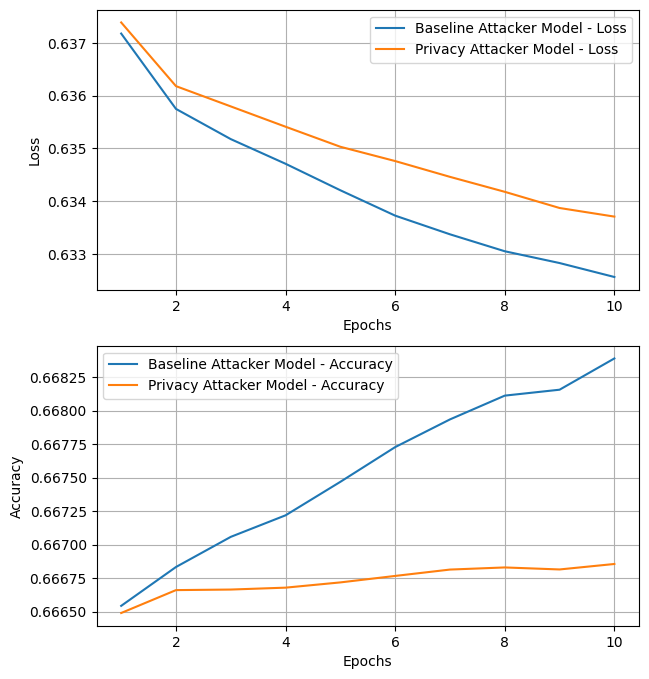

In [11]:
def evaluate_attacker(attacker_model, features, labels):
    attacker_model.eval()
    with torch.no_grad():
        outputs = attacker_model(features.to(device))
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(labels.cpu(), predicted.cpu())
    return accuracy

baseline_attacker_accuracy = evaluate_attacker(baseline_attacker, baseline_features, baseline_labels)
privacy_attacker_accuracy = evaluate_attacker(privacy_attacker, privacy_features, privacy_labels)

print(f'Baseline Attacker Model Accuracy: {baseline_attacker_accuracy:.5f}')
print(f'Privacy Attacker Model Accuracy: {privacy_attacker_accuracy:.5f}')

plt.figure(figsize=(7, 8))
plt.title('Loss and Accuracy History of Attacker Models')
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), baseline_loss_history, label='Baseline Attacker Model - Loss')
plt.plot(range(1, 11), privacy_loss_history, label='Privacy Attacker Model - Loss')
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), baseline_accuracy_history, label='Baseline Attacker Model - Accuracy')
plt.plot(range(1, 11), privacy_accuracy_history, label='Privacy Attacker Model - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Save the trained attacker models
torch.save(baseline_attacker.state_dict(), 'baseline_attacker_model.pth')
torch.save(privacy_attacker.state_dict(), 'privacy_attacker_model.pth')

# Save as .dict
torch.save(baseline_attacker.state_dict(), 'baseline_attacker_model.dict')
torch.save(privacy_attacker.state_dict(), 'privacy_attacker_model.dict')

print("Attacker models saved.")

Attacker models saved.


# part 3 - Membership Inference Attack

### Simulation Question 8.

**Attempt to train an attacker model for the given private model (private_model.pth). We will test it on our dataset during the online presentation session. A competitive bonus point is available for the best performance.**

Define the CIFAR-10 Classifier Model

In [18]:
from torchvision import models
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


class CIFAR10Classifier(nn.Module):
  def __init__(self):
    super(CIFAR10Classifier, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, 1)
    self.conv2 = nn.Conv2d(16, 32, 3, 1)
    self.dropout1 = nn.Dropout2d(0.25)
    self.dropout2 = nn.Dropout2d(0.5)
    self.fc1 = nn.Linear(6272, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    x = self.dropout1(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    return x



Load and Prepare the Data

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import Subset, DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, precision_score, recall_score ,f1_score
from sklearn.linear_model import LogisticRegression

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CIFAR10Classifier()
state_dict = torch.load("model_state_dict.pth", map_location=device)
new_state_dict = {key.replace('_module.', ''): value for key, value in state_dict.items()}
model.load_state_dict(new_state_dict)
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

DATA_ROOT = '../cifar10'
BATCH_SIZE = 64

# Load the indices from list.txt
indices_file = 'list.txt' ############
with open(indices_file, 'r') as f:
    indices = [int(line.strip()) for line in f]

full_train_dataset = CIFAR10(root=DATA_ROOT, train=True, download=True, transform=transform)
test_dataset = CIFAR10(root=DATA_ROOT, train=False, download=True, transform=transform)

train_indices_set = set(indices)
all_indices = set(range(len(full_train_dataset)))
other_indices = list(all_indices - train_indices_set)

train_dataset = Subset(full_train_dataset, indices[:len(indices)//2])  ###########
other_dataset = Subset(full_train_dataset, other_indices)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
other_loader = DataLoader(other_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Create labels
train_labels = torch.ones(len(train_dataset)).to(device)
other_labels = torch.zeros(len(other_dataset)).to(device)
test_labels = torch.zeros(len(test_dataset)).to(device)
####################################
#if you have an attacker model for each class, modify the above code.
####################################

def extract_features(model, dataloader):
    model.eval()
    features = []
    with torch.no_grad():
        for data in dataloader:
            inputs, _ = data
            inputs = inputs.to(device)
            outputs = model(inputs)
            features.append(outputs)
    return torch.cat(features).to(device)

train_features = extract_features(model, train_loader)
other_features = extract_features(model, other_loader)
test_features = extract_features(model, test_loader)


combined_features = torch.cat((train_features, other_features, test_features))
combined_labels = torch.cat((train_labels, other_labels, test_labels))


new_dataset = TensorDataset(combined_features, combined_labels)
new_loader = DataLoader(new_dataset, batch_size=BATCH_SIZE, shuffle=True)

#load your attacker model
attacker = AttackerModel().to(device)
attacker.load_state_dict(torch.load('privacy_attacker_model.pth'))
#############################################

# Calculate training accuracy, confusion matrix, precision, and recall
attacker.eval()
all_labels = []
all_predicted = []
correct = 0
total = 0

with torch.no_grad():
    for features, labels in new_loader:
        features, labels = features.to(device), labels.to(device)
        outputs = attacker(features).squeeze()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())

accuracy = correct / total
print(f'Training Accuracy: {accuracy:.4f}')

cm = confusion_matrix(all_labels, all_predicted)
precision = precision_score(all_labels, all_predicted)
recall = recall_score(all_labels, all_predicted)
f1 = f1_score(all_labels, all_predicted)

print(f'Confusion Matrix:\n{cm}')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Training Accuracy: 0.5004
Confusion Matrix:
[[   48 19952]
 [   32 19968]]
Precision: 0.5002
Recall: 0.9984
F1 Score: 0.6665
